In [37]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [109]:
# mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
# Define the paths to the train and test directories
train_dir = "/content/drive/My Drive/Colab Notebooks/6/Train"
test_dir = "/content/drive/My Drive/Colab Notebooks/6/Valid"

# Define the image size
image_size = (64, 64)

# Define the number of training and testing samples
num_train_samples = 6000
num_test_samples = 2000

# Initialize the arrays for the training and testing data
x_train = np.zeros((num_train_samples, image_size[0], image_size[1], 3))
y_train = np.zeros((num_train_samples,))
x_test = np.zeros((num_test_samples, image_size[0], image_size[1], 3))
y_test = np.zeros((num_test_samples,))

# Load the real images for the training and testing data
for i in range(3000):
    img_path = os.path.join(train_dir, "Real", "img_{}.png".format(i))
    img = cv2.imread(img_path)
    x_train[i] = img
    y_train[i] = 1.0

for i in range(1000):
    img_path = os.path.join(test_dir, "Real", "img_{}.png".format(i))
    img = cv2.imread(img_path)
    x_test[i] = img
    y_test[i] = 1.0

# Load the fake images for the training and testing data
for i in range(3000):
    img_path = os.path.join(train_dir, "Fake", "img_{}.png".format(i))
    img = cv2.imread(img_path)
    x_train[3000 + i] = img
    y_train[3000 + i] = 0.0

for i in range(1000):
    img_path = os.path.join(test_dir, "Fake", "img_{}.png".format(i))
    img = cv2.imread(img_path)
    x_test[1000 + i] = img
    y_test[1000 + i] = 0.0

# Normalize the pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Shuffle the training data
indices = np.arange(len(x_train))
np.random.shuffle(indices)
x_train = x_train[indices]
y_train = y_train[indices]


In [115]:
# Define the network architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [130]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
188/188 [==============================] - 53s 279ms/step - loss: 3.4736e-06 - accuracy: 1.0000 - val_loss: 3.0201e-05 - val_accuracy: 1.0000
Epoch 2/10
188/188 [==============================] - 50s 266ms/step - loss: 2.4732e-06 - accuracy: 1.0000 - val_loss: 2.6146e-05 - val_accuracy: 1.0000
Epoch 3/10
188/188 [==============================] - 48s 258ms/step - loss: 3.2232e-06 - accuracy: 1.0000 - val_loss: 3.6172e-05 - val_accuracy: 1.0000
Epoch 4/10
188/188 [==============================] - 52s 276ms/step - loss: 3.9163e-06 - accuracy: 1.0000 - val_loss: 2.1973e-05 - val_accuracy: 1.0000
Epoch 5/10
188/188 [==============================] - 48s 255ms/step - loss: 1.5727e-06 - accuracy: 1.0000 - val_loss: 2.0258e-05 - val_accuracy: 1.0000
Epoch 6/10
188/188 [==============================] - 50s 265ms/step - loss: 1.4928e-06 - accuracy: 1.0000 - val_loss: 2.0821e-05 - val_accuracy: 1.0000
Epoch 7/10
188/188 [==============================] - 50s 267ms/step - loss: 1.290

In [131]:
# Evaluate the model on the testing set
loss, accuracy = model.evaluate(x_test, y_test)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

63/63 [==============================] - 6s 89ms/step - loss: 1.6420e-05 - accuracy: 1.0000
Loss:  1.6420466636191122e-05
Accuracy:  1.0


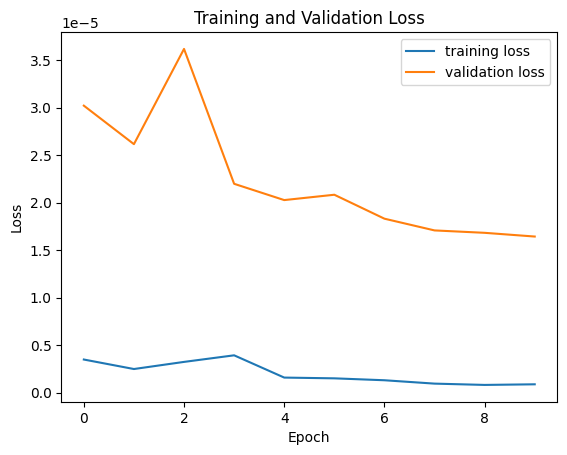

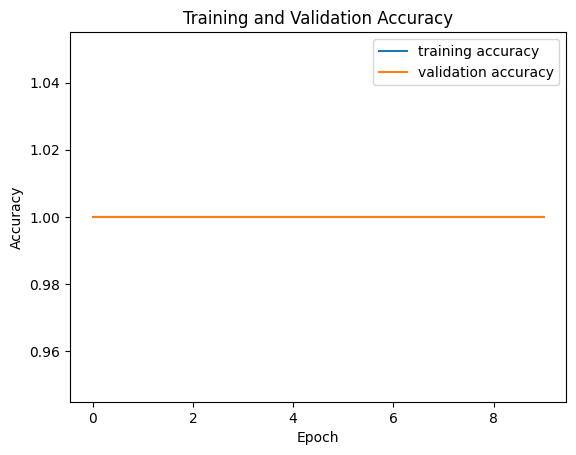

In [132]:

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [134]:
# Save the model
model.save("/content/drive/My Drive/Colab Notebooks/6/galaxy_classification_model.h5")
